In [8]:
os.chdir('..')

In [9]:
!pwd

/home/jovyan/FFT


In [3]:
from scipy.io import wavfile # get the api
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian
from scipy.signal.windows import tukey
import os

# Configuration
FPS = 30
FFT_WINDOW_SECONDS = 1/4 # how many seconds of audio make up an FFT window
PATH='.'
# Note range to display
FREQ_MIN = 10
FREQ_MAX = 1000
AUDIO_FILE = "content/gammes.wav"

fs, data = wavfile.read(AUDIO_FILE) # load the data
audio = data.T[0] # this is a two channel soundtrack, get the first track

FFT_WINDOW_SECONDS = 1/4 # how many seconds of audio make up an FFT window
windowsize=int(fs*FFT_WINDOW_SECONDS)
FRAME_STEP = (fs / FPS) # audio samples per video frame
FFT_WINDOW_SIZE = int(fs * FFT_WINDOW_SECONDS)
AUDIO_LENGTH = len(audio)/fs




/tmp/ipykernel_78/151435157.py:18: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(AUDIO_FILE) # load the data


In [3]:
windowsize

4800

In [4]:
# Application de la FFT

g_std = 8  # standard deviation for Gaussian window in samples
w = tukey(windowsize)  # symmetric Gaussian window
SFT = ShortTimeFFT(w, hop=10, fs=fs,scale_to='magnitude')
Sx = SFT.stft(audio)  # perform the STFT

In [33]:

SFT.extent(N)


(-0.00041666666666666664, 38.37333333333333, 0.0, 24960.0)

/tmp/ipykernel_75/2439063682.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


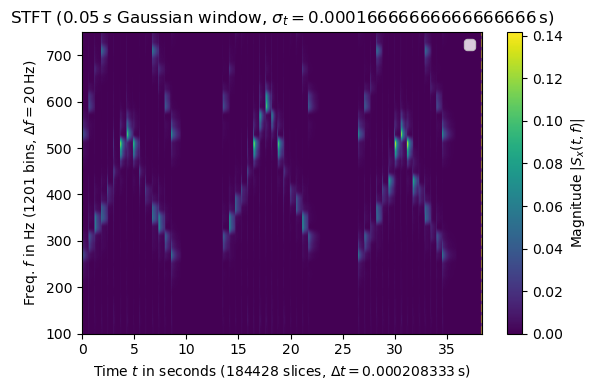

In [9]:
fig1, ax1 = plt.subplots(figsize=(6., 4.))  # enlarge plot a bit
N=len(audio)
DURATION=len(audio)/fs

t_x = np.arange(N)/fs
t_lo, t_hi = SFT.extent(N)[:2]  # time range of plot
ax1.set_title(rf"STFT ({SFT.m_num*SFT.T:g}$\,s$ Gaussian window, " +
              rf"$\sigma_t={g_std*SFT.T}\,$s)")
ax1.set(xlabel=f"Time $t$ in seconds ({SFT.p_num(N)} slices, " +
               rf"$\Delta t = {SFT.delta_t:g}\,$s)",
        ylabel=f"Freq. $f$ in Hz ({SFT.f_pts} bins, " +
               rf"$\Delta f = {SFT.delta_f:g}\,$Hz)",

        xlim=(t_lo, t_hi),ylim=(100,750))

im1 = ax1.imshow(abs(Sx), origin='lower', aspect='auto',
                 extent=SFT.extent(N), cmap='viridis')
fig1.colorbar(im1, label="Magnitude $|S_x(t, f)|$")

# Shade areas where window slices stick out to the side:
for t0_, t1_ in [(t_lo, SFT.lower_border_end[0] * SFT.T),
                 (SFT.upper_border_begin(N)[0] * SFT.T, t_hi)]:
    ax1.axvspan(t0_, t1_, color='w', linewidth=0, alpha=.2)

for t_ in [0, N * SFT.T]:  # mark signal borders with vertical line:
    ax1.axvline(t_, color='y', linestyle='--', alpha=0.5)
ax1.legend()
fig1.tight_layout()
plt.show()

In [97]:
# This create some bins for a scale with for each note a lower bound and an upper bound. 

from math import log2
from math import pow

notescale=["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]
increment=1/12
tolerance=1/30
alog=log2(440)
bornes=[]
notes=[]

# construction all notes fundamental frequency interval above A3
# you can compupte the span above A in octave with the formula
# (range - distance to above C) /2   ==> 39-3 / 12 = 3
for i in range(39):
    lowerbound=pow(2,alog+increment*i-tolerance)
    upperbound=pow(2,alog+increment*i+tolerance)
    bornes.extend([lowerbound,upperbound])
bornes.extend([upperbound])
# construction all notes fundamental frequency interval below A3
# you can compupte the span below A in octave with the formula
# (range - distance to below C) /2   ==> 46 - 10 / 2

for i in range(1,46):
    lowerbound=pow(2,alog-increment*i-tolerance)
    upperbound=pow(2,alog-increment*i+tolerance)
    bornes.extend([lowerbound,upperbound])

bornes.extend([0])
bornes.sort()
keyboard=["OutBoundLower"]
for i in range (0,7):
    for j in notescale:
        notename=j+str(i)
        keyboard.append(notename)
keyboard.append("Outbound upper")

len(bornes)//2
#len(keyboard)
len(keyboard)

86

In [113]:
newtable

array([[-50, -50, -50, ..., -50, -50, -50],
       [-50, -50, -50, ..., -50, -50, -50],
       [-50, -50, -50, ..., -50, -50, -50],
       ...,
       [-50, -50, -50, ..., -50, -50, -50],
       [-50, -50, -50, ..., -50, -50, -50],
       [-50, -50, -50, ..., -50, -50, -50]])

In [99]:
# Construction de la table mappant table vers index de note.
mapftonote={}
# Nous cherchons à mapper un fréquence de la FFT vers une note.
for i,f in enumerate(SFT.f):
    index=np.searchsorted(bornes,f)
    mapftonote[i]=index
# Nous inversons la mapping pour permettre une surjection des fréquence vers une note
inv_map = {}
for k, v in mapftonote.items():
    inv_map[v] = inv_map.get(v, []) + [k]

/tmp/ipykernel_125/1524697241.py:18: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,y = wavfile.read(AUDIO_FILE) # load the data


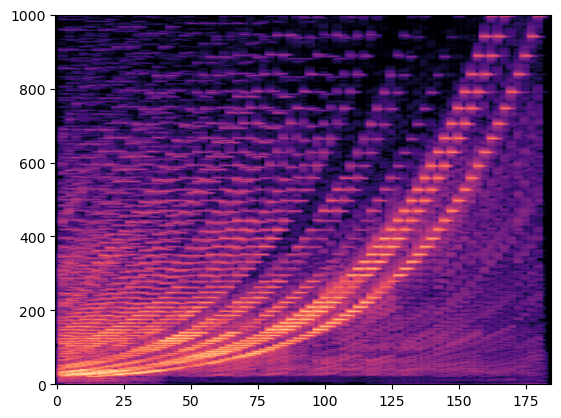

In [116]:
from scipy.io import wavfile # get the api
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian
from scipy.signal.windows import tukey
import os
import scipy.signal as signal

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import square, ShortTimeFFT
from scipy.signal.windows import gaussian


AUDIO_FILE = "content/triade-sus-c0-120.wav"

fs,y = wavfile.read(AUDIO_FILE) # load the data
y=y.T[0]*1000


FFT_WINDOW_SECONDS = 1/2 # how many seconds of audio make up an FFT window
windowsize=int(fs*FFT_WINDOW_SECONDS)
win = tukey(windowsize)  # symmetric Gaussian window

SFT = ShortTimeFFT(win, hop=fs//10, fs=fs,  scale_to='psd')

Sx2 = SFT.spectrogram(y)
x=[i/10 for i in range (len(y)*10//fs)]

Sx_dB = 10 * np.log10(np.fmax(Sx2, 1e-5))  # limit range to -40 dB
im1 = plt.imshow(Sx_dB, origin='lower', aspect='auto', cmap='magma')
plt.ylim(0,1000)


plt.show()




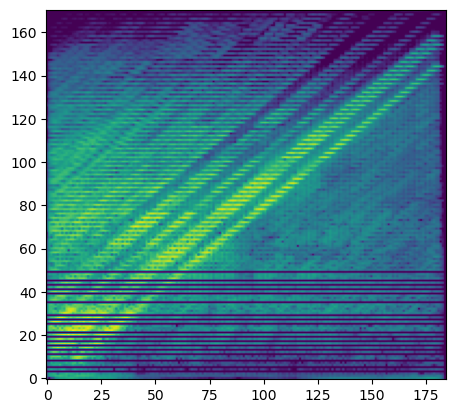

In [119]:
# Nous prenons l'analyse FFT et la convertissons en une analyse note.
# Construction du X qui servira à l'apprentissage profond.

Sx_dB.shape
newtable=np.full((len(bornes)+1,Sx_dB.shape[1]),-50)

# On parcours tous les instants du spectrogramme.
for i in range(Sx_dB.shape[1]):
    #Pour chaque bin de fréquence (note ou intervalle entre note) nous aggrégeons sur la puissance maximale de de fréquence
    for k,v in inv_map.items():
        newtable[k,i]=np.max(Sx_dB[v,i])

plt.imshow(newtable, origin='lower')


In [128]:
Yunison=np.zeros((newtable.shape[0],84))
Yunison.shape

for i in range(171):
    cellj=i//4
    Yunison[i,cellj]=1

In [53]:
np.min(Sx_dB)
np.max(Sx_dB)
np.percentile(Sx_dB,99)


-16.354988545373626

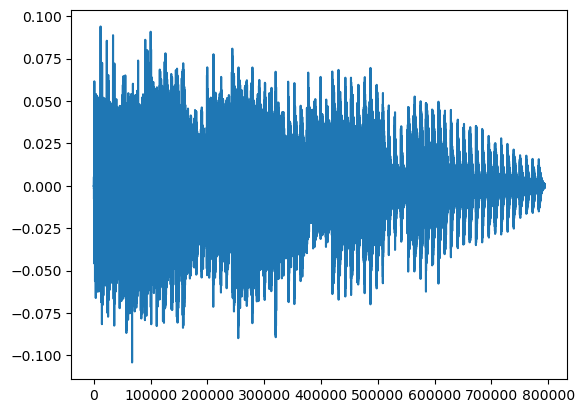

In [50]:
plt.plot(x)

500

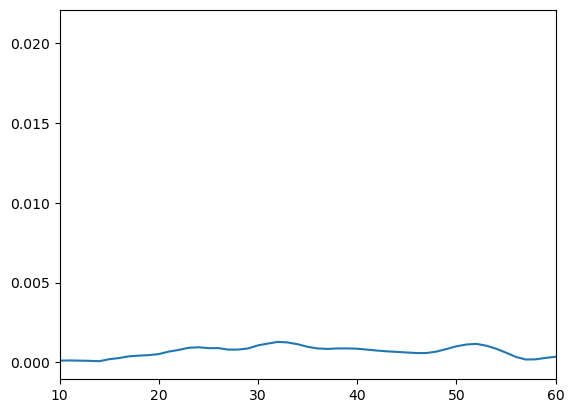

In [5]:
Bx=abs(Sx)

plt.plot(Bx[:,48000*3])
plt.xlim(10,60)
from math import log2

12*log2(235/400)
25*20

In [41]:
Bx

array([[6.00511462e-20, 7.44218845e-17, 2.50986520e-15, ...,
        1.53853185e-12, 4.21294935e-13, 3.83373719e-14],
       [6.00510691e-20, 7.44257753e-17, 2.50982544e-15, ...,
        1.53849584e-12, 4.21290370e-13, 3.83372808e-14],
       [6.00508380e-20, 7.44374463e-17, 2.50970615e-15, ...,
        1.53838783e-12, 4.21276675e-13, 3.83370073e-14],
       ...,
       [1.59639683e-19, 5.52329086e-19, 5.65623920e-17, ...,
        6.89259961e-14, 2.90532506e-14, 6.12716730e-15],
       [1.59639946e-19, 5.51654951e-19, 5.65648047e-17, ...,
        6.89259469e-14, 2.90532306e-14, 6.12716212e-15],
       [1.59640034e-19, 5.51430103e-19, 5.65656091e-17, ...,
        6.89259304e-14, 2.90532239e-14, 6.12716039e-15]])

In [8]:
import numpy as np
from math import log2
freqs=np.unique(np.where(Bx>0.03)[0])/FFT_WINDOW_SECONDS

print(freqs)
np.log2(freqs/440)*12




[ 260.  264.  292.  328.  332.  348.  352.  368.  372.  412.  416.  492.
  496.  500.  520.  524.  528.  552.  556.  584.  588.  592.  700. 1112.]


array([-9.10790281, -8.84358713, -7.09842186, -5.08569251, -4.87584339,
       -4.06099461, -3.86313714, -3.09357309, -2.90641083, -1.13831024,
       -0.97103994,  1.9338575 ,  2.07403916,  2.21309485,  2.89209719,
        3.02475946,  3.15641287,  3.92597692,  4.05097631,  4.90157814,
        5.01975158,  5.13712383,  8.03821678, 16.05097631])

In [ ]:
sec=.25
frame=int(sec*fs)
plt.plot(Bx[:,frame])
plt.plot(Bx[:,frame*2])
plt.plot(Bx[:,frame*3])
plt.plot(Bx[:,frame*4])
plt.xlim(0,300)
from math import log2

ligne=Bx[:,frame]






(array([ 971., 3930., 1142.,    0., 2805., 2872.,  662.,  403., 4179.,
        3343.]),
 array([1.300000e+01, 1.661830e+04, 3.322360e+04, 4.982890e+04,
        6.643420e+04, 8.303950e+04, 9.964480e+04, 1.162501e+05,
        1.328554e+05, 1.494607e+05, 1.660660e+05]),
 <BarContainer object of 10 artists>)

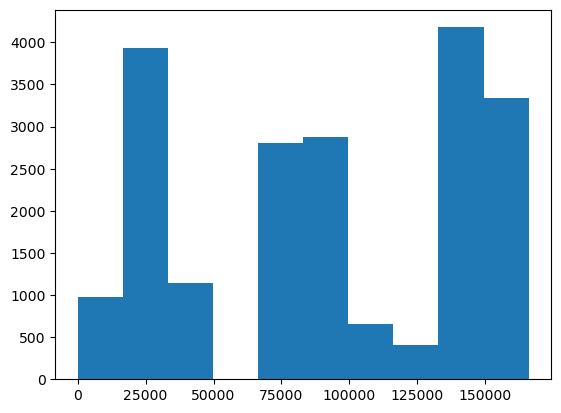

In [44]:
plt.hist(unique)